In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

72.75950686256462 82.72118970638383
-82.74749635204252 -66.92371105819714
-42.92254786552674 -27.78706115290305
-69.53025590808669 121.94397800487593
-19.4680570979925 -7.349721586587975
-20.318146739959275 174.3693875811755
42.07374657576909 -86.93337109475945
6.31043381387795 162.82660314029897
-18.339293147476326 107.68772023707777
4.307386094226132 82.0041903471934
59.83876926467204 -68.71615396404277
88.65250056320241 106.39222766534931
32.29230144596967 -150.0524044337127
-68.75586083564652 -51.96679753646242
-39.759923485468576 -172.654693498074
-4.811050589907211 -107.97694850548574
-3.0034449291079 -33.55949081491514
53.93708999983312 64.90881051706856
-17.18001253005903 -60.26763506143965
19.881305206464432 38.02020874459188
-15.510627785751751 35.81903601904247
81.29211303285064 -128.37535943053035
-81.28208015483239 -115.80398309182505
-20.238521325494318 -110.92806553627526
73.81573263031265 -117.86247963212702
-52.3737366689045 -27.351597276065604
-80.80312062188469 166.2

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest citi for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, the we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

600

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Build the basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4886b7273f273c59ab7b181d18b105f8


In [9]:
# Import the time library and the datetime module from the datetine library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logginf purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City" : city.title(),
                         "Lat" : city_lat,
                         "Lng" : city_lng,
                         "Max Temp" : city_max_temp,
                         "Humidity" : city_humidity,
                         "Cloudiness" : city_clouds,
                         "Wind Speed" : city_wind,
                         "Country" : city_country,
                         "Date" : city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate the Data Loading is complete
print("---------------------------")
print("Date Retrieval Complete    ")
print("---------------------------")

        



Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | michigan city
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | hambantota
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | zverinogolovskoye
Processing Record 18 of Set 1 | san rafael
Processing Record 19 of Set 1 | sawakin
Processing Record 20 of Set 1 | phalombe
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of

City not found. Skipping...
Processing Record 37 of Set 4 | saskatoon
Processing Record 38 of Set 4 | aquiraz
Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | constantine
Processing Record 41 of Set 4 | aksu
Processing Record 42 of Set 4 | gama
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | cururupu
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | vostok
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | visby
Processing Record 50 of Set 4 | pocatello
Processing Record 1 of Set 5 | pingliang
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | bud
Processing Record 4 of Set 5 | fairbanks
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | camacha
Processing Record 7 of Set 5 | vilhena
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5 | krasnoselkup
Processing Record 10 of Set 5 | lao cai
Processing Re

Processing Record 30 of Set 8 | bosobolo
Processing Record 31 of Set 8 | coolum beach
Processing Record 32 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 33 of Set 8 | sousa
Processing Record 34 of Set 8 | wukari
Processing Record 35 of Set 8 | kemalpasa
Processing Record 36 of Set 8 | isiro
Processing Record 37 of Set 8 | businga
Processing Record 38 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 8 | zaranj
Processing Record 40 of Set 8 | muros
Processing Record 41 of Set 8 | chuy
Processing Record 42 of Set 8 | porkhov
Processing Record 43 of Set 8 | emerald
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | biak
Processing Record 46 of Set 8 | butte
Processing Record 47 of Set 8 | talara
Processing Record 48 of Set 8 | marsciano
Processing Record 49 of Set 8 | yerbogachen
Processing Record 50 of Set 8 | beyneu
Processing Record 1 of Set 9 | quang ngai
Processing Record 2 of Set 9 | marsh harbour
Processing Record 3 o

Processing Record 16 of Set 12 | birjand
Processing Record 17 of Set 12 | sokoto
Processing Record 18 of Set 12 | nabire
Processing Record 19 of Set 12 | punta gorda
Processing Record 20 of Set 12 | ola
Processing Record 21 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 22 of Set 12 | bababe
City not found. Skipping...
Processing Record 23 of Set 12 | zhigansk
Processing Record 24 of Set 12 | aviles
Processing Record 25 of Set 12 | havoysund
Processing Record 26 of Set 12 | yangjiang
Processing Record 27 of Set 12 | verkhoyansk
Processing Record 28 of Set 12 | newton
Processing Record 29 of Set 12 | iquique
Processing Record 30 of Set 12 | fort nelson
Processing Record 31 of Set 12 | pribelskiy
City not found. Skipping...
Processing Record 32 of Set 12 | ibipeba
Processing Record 33 of Set 12 | araguaina
Processing Record 34 of Set 12 | kaili
Processing Record 35 of Set 12 | harwich
Processing Record 36 of Set 12 | barcelos
Processing Record 37 of Set 12 | kaukaun

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,33.42,96,100,21.23,RU,2022-10-15 01:27:38
1,Ushuaia,-54.8000,-68.3000,56.86,44,40,16.11,AR,2022-10-15 01:23:57
2,Arraial Do Cabo,-22.9661,-42.0278,71.65,93,70,9.55,BR,2022-10-15 01:27:39
3,Albany,42.6001,-73.9662,48.61,84,0,3.53,US,2022-10-15 01:25:14
4,Jamestown,42.0970,-79.2353,49.71,57,20,4.61,US,2022-10-15 01:26:08


In [18]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-10-15 01:27:38,73.5069,80.5464,33.42,96,100,21.23
1,Ushuaia,AR,2022-10-15 01:23:57,-54.8000,-68.3000,56.86,44,40,16.11
2,Arraial Do Cabo,BR,2022-10-15 01:27:39,-22.9661,-42.0278,71.65,93,70,9.55
3,Albany,US,2022-10-15 01:25:14,42.6001,-73.9662,48.61,84,0,3.53
4,Jamestown,US,2022-10-15 01:26:08,42.0970,-79.2353,49.71,57,20,4.61


In [19]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [22]:
# Import the time module
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/14/22'

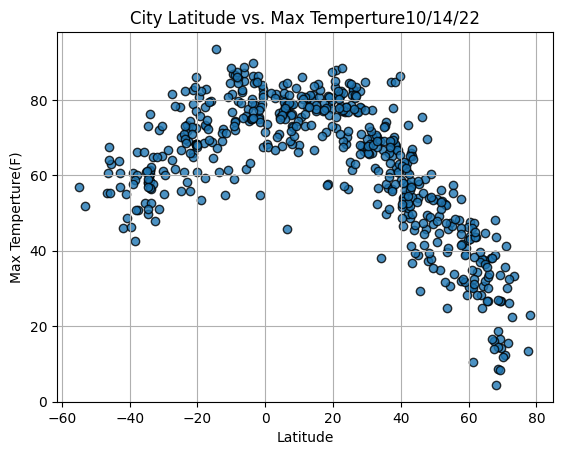

In [23]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(F"City Latitude vs. Max Temperture" + time.strftime("%x"))
plt.ylabel("Max Temperture(F)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

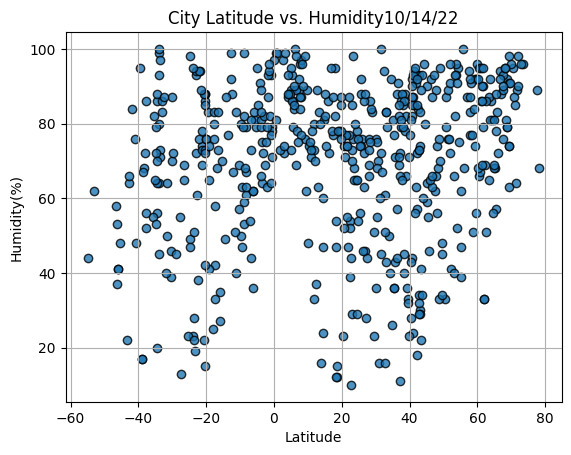

In [25]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(F"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

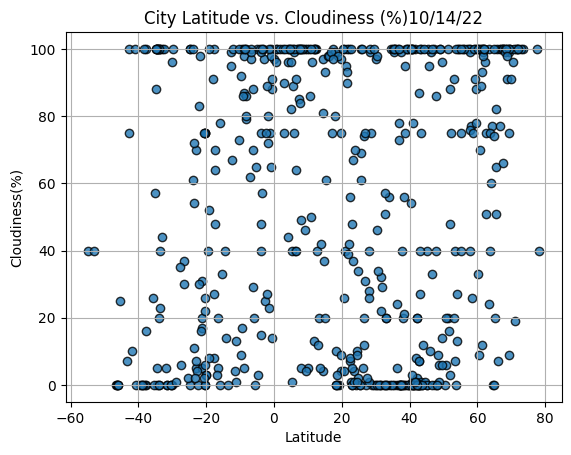

In [26]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(F"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()